In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("Input/Simulation4.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

-9831.426358993893


In [5]:
#parameters of best walker
best_walker = chain[best_log][1]

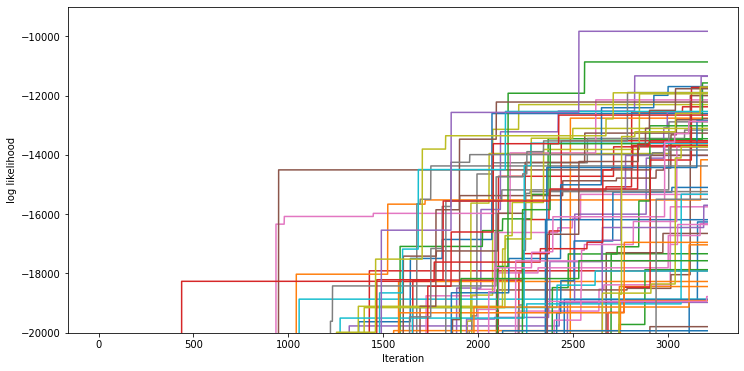

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-20000, -9000)
    plt.xlim()
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

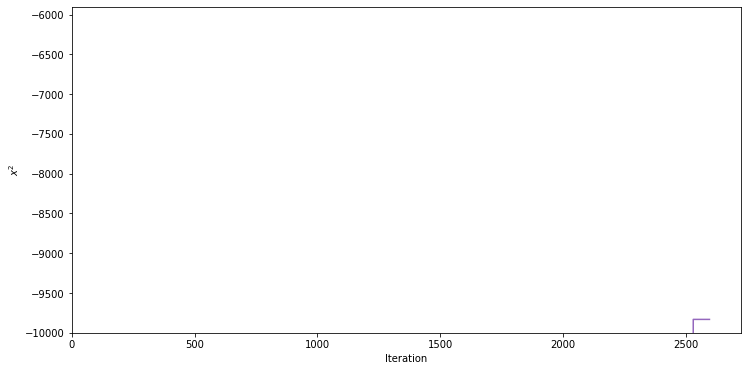

In [8]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5900)
    plt.xlim(0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([17., 16., 19., 34., 26., 36., 28., 34., 19.,  9., 20., 21., 10.,
       22., 34., 19., 34., 21., 19., 20., 14., 22., 18., 18., 12., 26.,
       18., 20., 15., 18., 11., 12., 16., 14., 35., 35.,  8., 18., 23.,
       13., 13., 18., 18., 14., 24., 21., 20., 19.,  5., 21., 15., 20.,
       22., 25., 26., 17., 16., 23., 10., 26., 36., 22., 13., 14., 21.,
       16., 23., 11., 32., 20., 35., 23., 19., 32., 22., 17., 23., 19.,
       15., 17., 28., 18., 15., 12., 21.,  8., 31., 33., 15., 17., 20.,
       16., 17., 22.,  7., 21., 21., 30., 26., 20., 13., 17., 18., 22.,
       17., 20., 24., 26., 16., 18., 15., 16., 20., 24., 16., 33., 25.,
       23., 22., 22.])

[253.56095828 217.99546079 294.35940298 347.85797644 228.03050767
 268.92301162 283.50428452 302.44579109 294.45179005]
flat chain shape: (384960, 9)
flat log prob shape: (384960,)


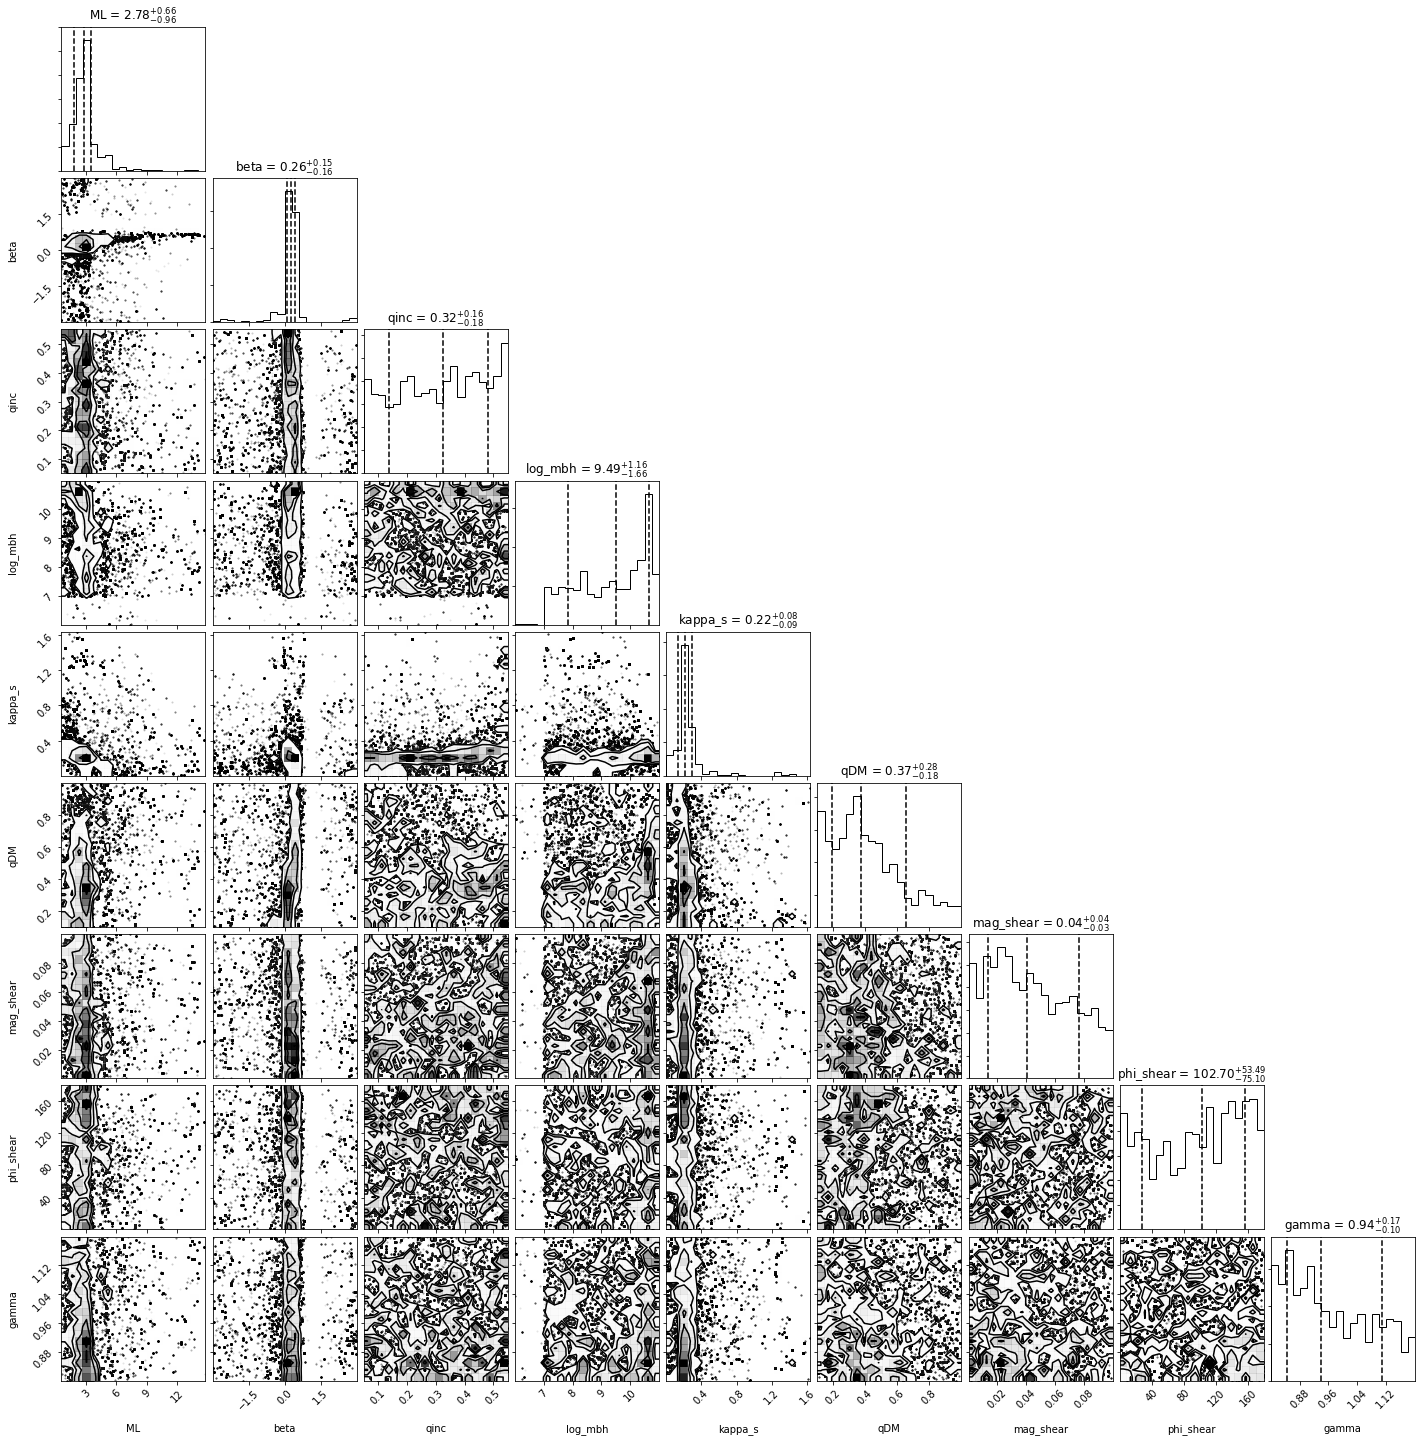

In [8]:
#Corner plots

labels = ["ML", "beta", "qinc", "log_mbh", "kappa_s", "qDM", "mag_shear", "phi_shear", "gamma"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

695 173
flat chain shape: (120, 9)
flat log prob shape: (120,)


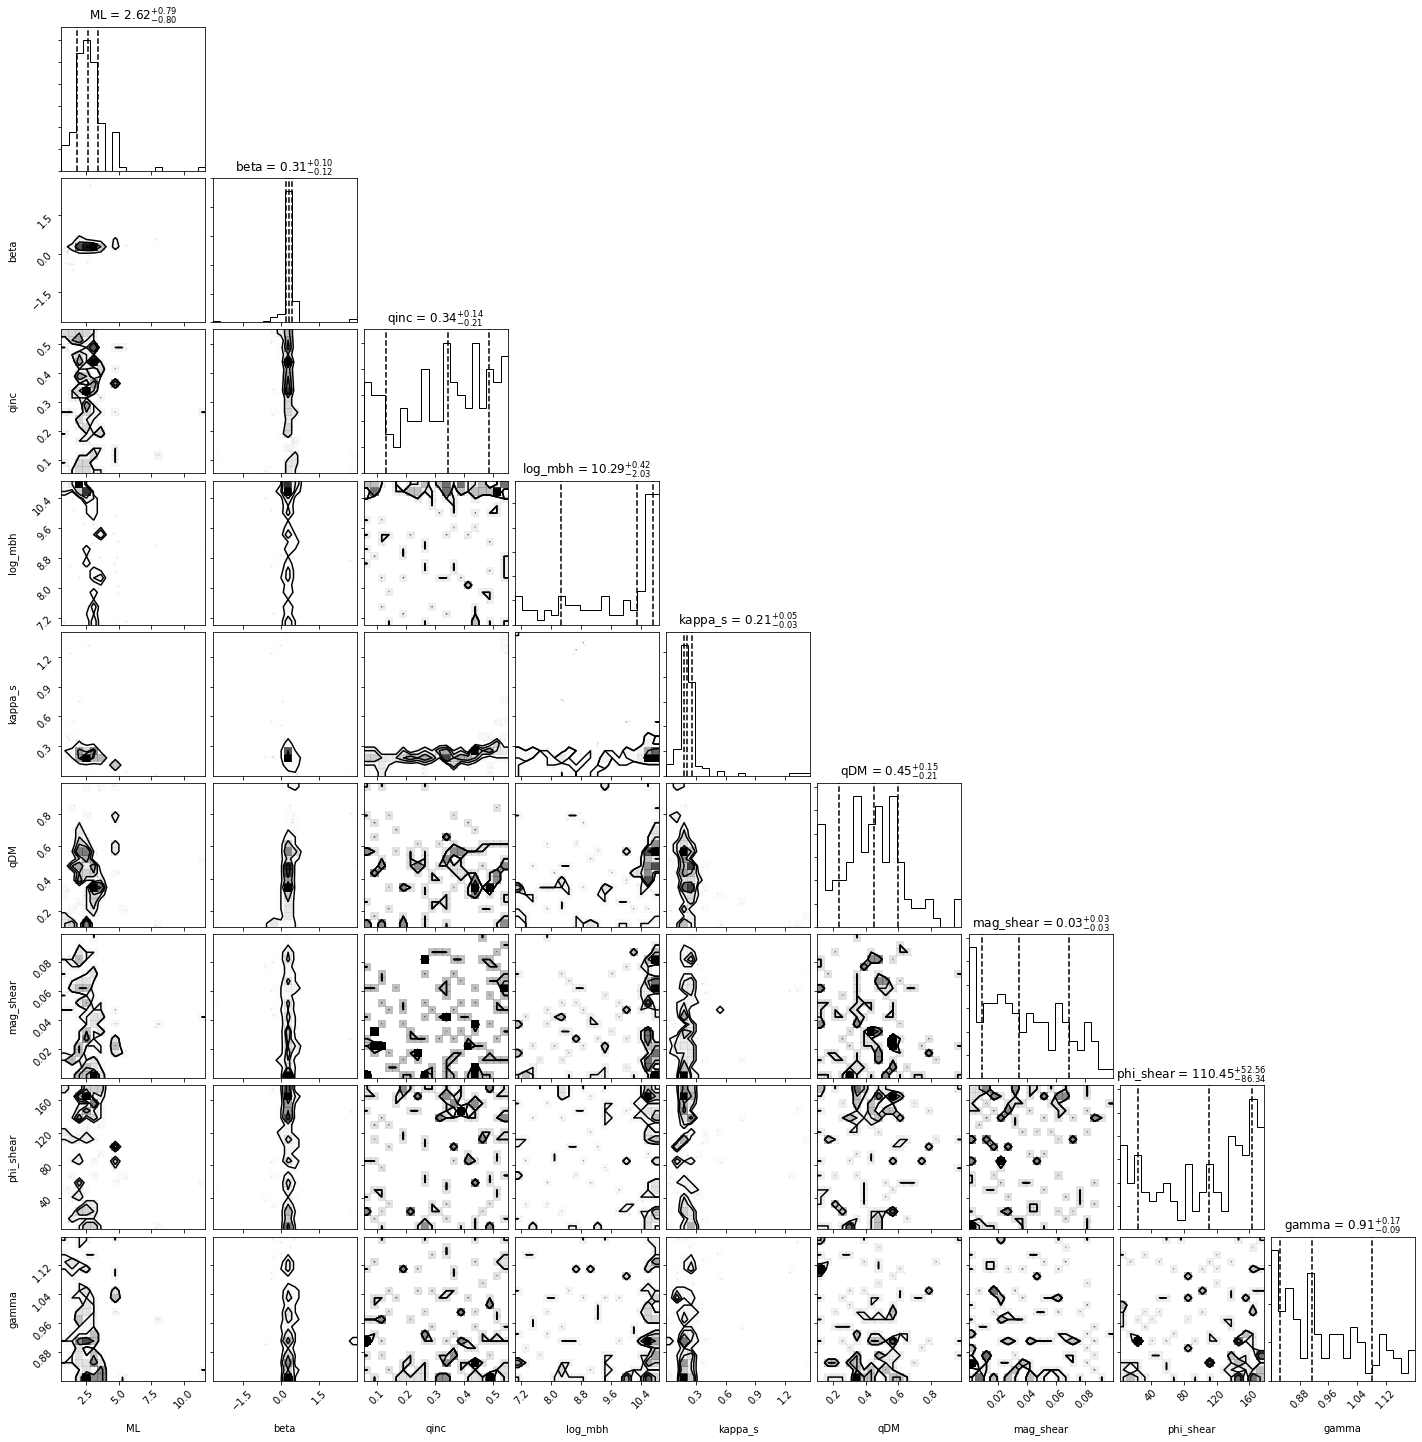

In [9]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "beta", "qinc", "log_mbh", "kappa_s", "qDM", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=2000 )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=2000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [10]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(9):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 9 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 426;
tau: [1773.98280961 1698.3900179  1987.32960401 1854.91274375 1936.680314
 1982.05498727 1554.58393125 1496.22139013 1961.71561773]

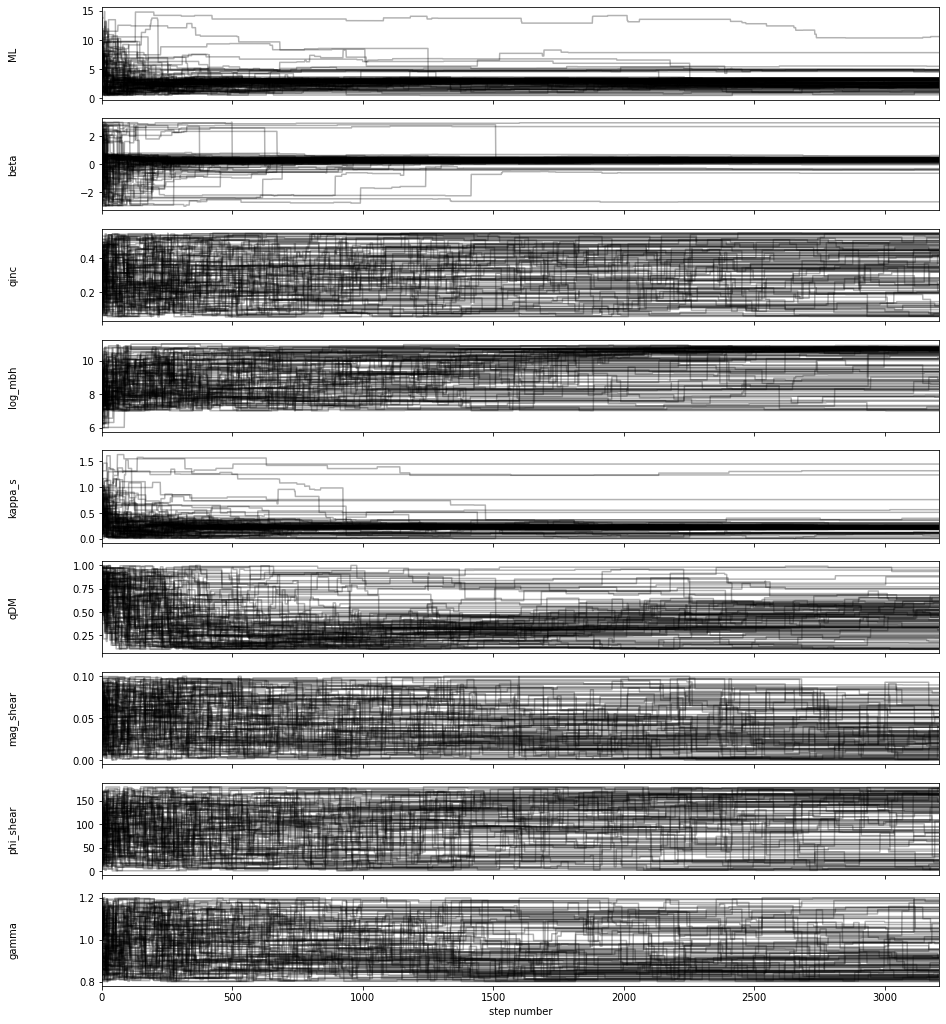

In [11]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [12]:
it, accep_tot, time, accep_100 = np.loadtxt("Input/Output_LogFile.txt", unpack=True)

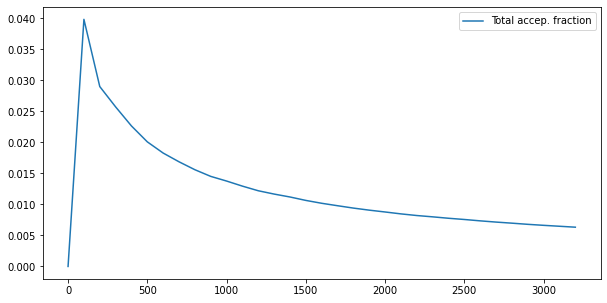

In [13]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

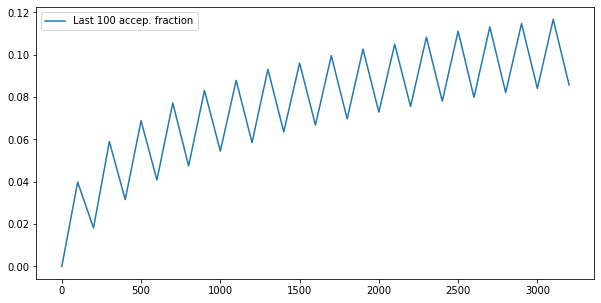

In [14]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [15]:
#Control time packages
import time
import os
os.environ["OMP_NUM_THREADS"] = "1"

#MPI
from schwimmbad import MPIPool

#General packages
import numpy as np
from My_Jampy import JAM
import emcee
import matplotlib.pyplot as plt

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import z_at_value
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#Combined Model package
import CombinedModel

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens tests/autolens_workspace/Test_4/Simulation_Data/"

In [16]:
def run():
#Reading MGE inputs
    surf_lum, sigma_lum, qobs_lum = np.loadtxt("Input/JAM_Input.txt", unpack=True)      #MGE decomposition
    surf_dm, sigma_dm , qobs_dm   = np.loadtxt("Input/eNFW.txt", unpack=True)           #DM component
    norm_psf, sigma_psf           = np.loadtxt("Input/MUSE_Psf_model.txt", unpack=True) #PSF
    x, y, vrms, erms              = np.loadtxt("Input/vrms_data.txt", unpack=True)      #vrms data
    
    pixsize = 0.2                                                           #MUSE pixel size
    z_l     = 0.299                                                         #Lens Redshift
    z_s     = 3.100                                                         #Source Redshift 
    D_l     = cosmo.angular_diameter_distance(z_l).value                    #Distance to Lens [Mpc] 
    
    ## Models inicialization

    """
        To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
    """  
    mbh     = 1e9                                                           #mass of black hole [log10(M_sun)]
    beta    = np.full_like(surf_lum, 0.35)                                  #anisotropy [ad]
    inc     = 75                                                            #inclination [deg]
    inc_rad = np.radians(inc)
    qinc    = np.sqrt(np.min(qobs_lum)**2 - 
                        (1 - np.min(qobs_lum)**2)/np.tan(inc_rad)**2)       #Deprojected axial ratio for inclination
    qDM     = np.sqrt( qobs_dm[0]**2 - np.cos(inc_rad)**2)/np.sin(inc_rad)  #Deprojected DM axial ratio
    kappa_s = 0.075                                                         #kappa_s of DM profile
    r_s     = 11.5                                                          #Scale radius of DM [arcsec]
    ml      = 5.00                                                          #mass to light ratio
    shear_comp = al.convert.shear_elliptical_comps_from(magnitude=0.02, phi=88) #external shear
    
    #Autolens Data
    imaging = al.Imaging.from_fits(
            image_path=f"{data_folder}/arcs_simulation.fits",
            noise_map_path=f"{data_folder}/noise_simulation.fits",
            psf_path=f"{data_folder}/psf_simulation.fits",
            pixel_scales=0.1,
        )

    mask = al.Mask.circular_annular(centre=(0.0, 0.), inner_radius=2.1, outer_radius=4.1,
                                  pixel_scales=imaging.pixel_scales, shape_2d=imaging.shape_2d) #Create a mask

    masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)     #Masked image
    #--------------------------------------------------------------------------------------------------#
    # JAMPY MODEL
    #Now we start our Jampy class
    Jam_model = JAM(ybin=y*pixsize, xbin=x*pixsize, inc=inc, distance=D_l, mbh=mbh, beta=beta, rms=vrms, erms=erms,
                       normpsf=norm_psf, sigmapsf=sigma_psf*pixsize, pixsize=pixsize)

    #Add Luminosity component
    Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                        qobs_lum=qobs_lum, ml=ml)
    #Add DM component
    Jam_model.DM_component(surf_dm=kappa_s * surf_dm, sigma_dm=sigma_dm, qobs_dm=qobs_dm)
    
    #--------------------------------------------------------------------------------------------------#
    # PYAUTOLENS MODEL
    #MGE mass profile
    mass_profile = al.mp.MGE()
    ell_comps    = al.convert.elliptical_comps_from(axis_ratio=qobs_dm[0], phi=0.0) #Elliptical components in Pyautolens units
    eNFW         = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_s, elliptical_comps=ell_comps ,scale_radius=r_s) #Analytical eNFW profile


    #Components
    #Do not include MGE DM component here
    mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                           surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml, mbh=mbh) 
    mass_profile.Analytic_Model(eNFW)  #Include Analytical NFW
    #--------------------------------------------------------------------------------------------------#
    # COMBINED MODEL

        #Just remembering, by default the model does not include dark matter.
    model = CombinedModel.Models(Jampy_model=Jam_model, mass_profile=mass_profile,
                                 masked_imaging=masked_image, quiet=False)

    model.mass_to_light(ml_kind='scalar')               #Setting gradient ML
    model.beta(beta_kind='scalar')                      #Seting vector anisotropy
    model.has_MGE_DM(a=True, filename="Input/eNFW.txt", include_MGE_DM="Dynamical") #Setting Dark matter component
    
    return model

In [17]:
model = run()

Change qinc limits to [0.0501, 0.55], defaults are [0.0, 1]


## Best Model

In [18]:
p0 = best_fit
p0

array([2.62425672e+00, 3.10542755e-01, 3.42132271e-01, 1.02946636e+01,
       2.11641432e-01, 4.48158311e-01, 3.44201522e-02, 1.10453406e+02,
       9.14410013e-01])

ParsDic {'ml': 2.624256720571309, 'beta': 0.310542755289848, 'qinc': 0.3421322712766511, 'log_mbh': 10.294663578420824, 'kappa_s': 0.21164143153430912, 'qDM': 0.4481583105166467, 'mag_shear': 0.034420152195549975, 'phi_shear': 110.45340613304333, 'gamma': 0.9144100125640906}
jam_axi_rms elapsed time sec: 0.75
inc=62.7 beta_z=0.31 M/L=1 BH=1.97e+10 chi2/DOF=299
Total mass MGE: 1.949e+13


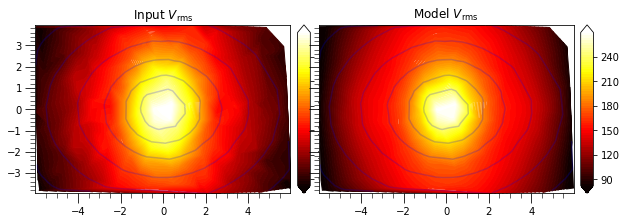

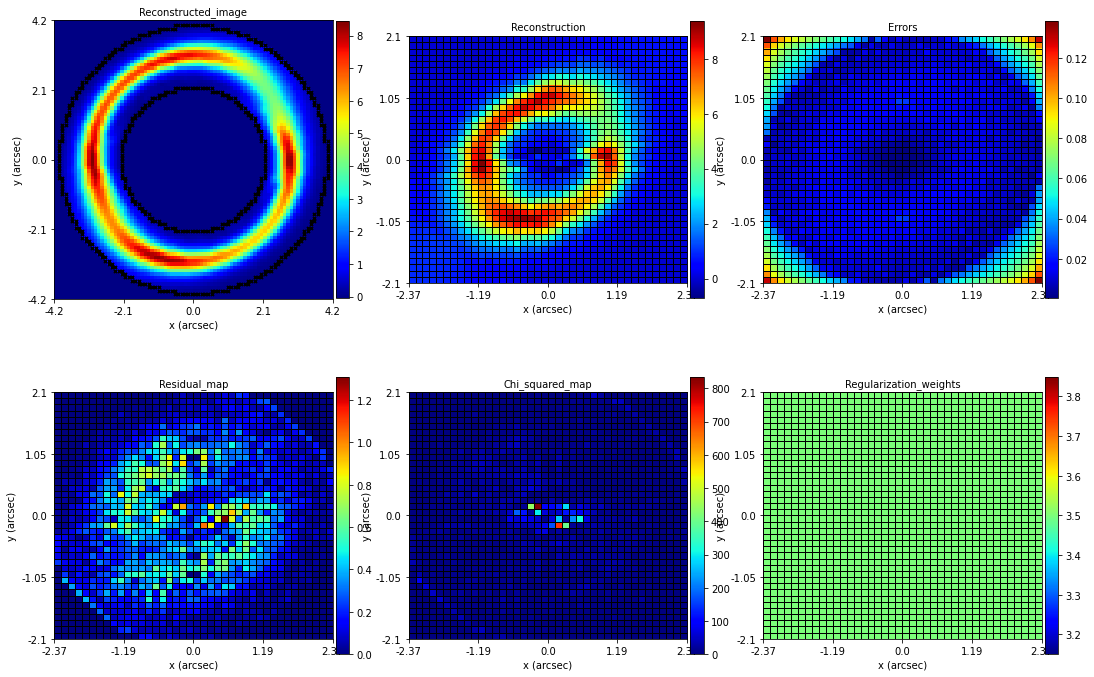

-54321.91812625919

In [19]:
plt.figure(figsize=(10,10))
model(p0)

## Best likelihood

In [20]:
p0 = best_walker
p0

array([4.68683977e+00, 3.96231544e-01, 3.59553866e-01, 8.64785071e+00,
       1.14060426e-01, 6.33355327e-01, 2.76687356e-02, 1.03696416e+02,
       1.10072363e+00])

ParsDic {'ml': 4.6868397683736545, 'beta': 0.3962315439438542, 'qinc': 0.35955386556216606, 'log_mbh': 8.647850709936588, 'kappa_s': 0.11406042635341192, 'qDM': 0.6333553265281032, 'mag_shear': 0.027668735631530803, 'phi_shear': 103.69641617848069, 'gamma': 1.1007236340548738}
jam_axi_rms elapsed time sec: 0.62
inc=63.5 beta_z=0.40 M/L=1 BH=4.44e+08 chi2/DOF=13.5
Total mass MGE: 1.273e+13


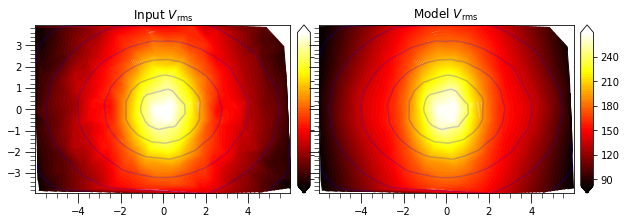

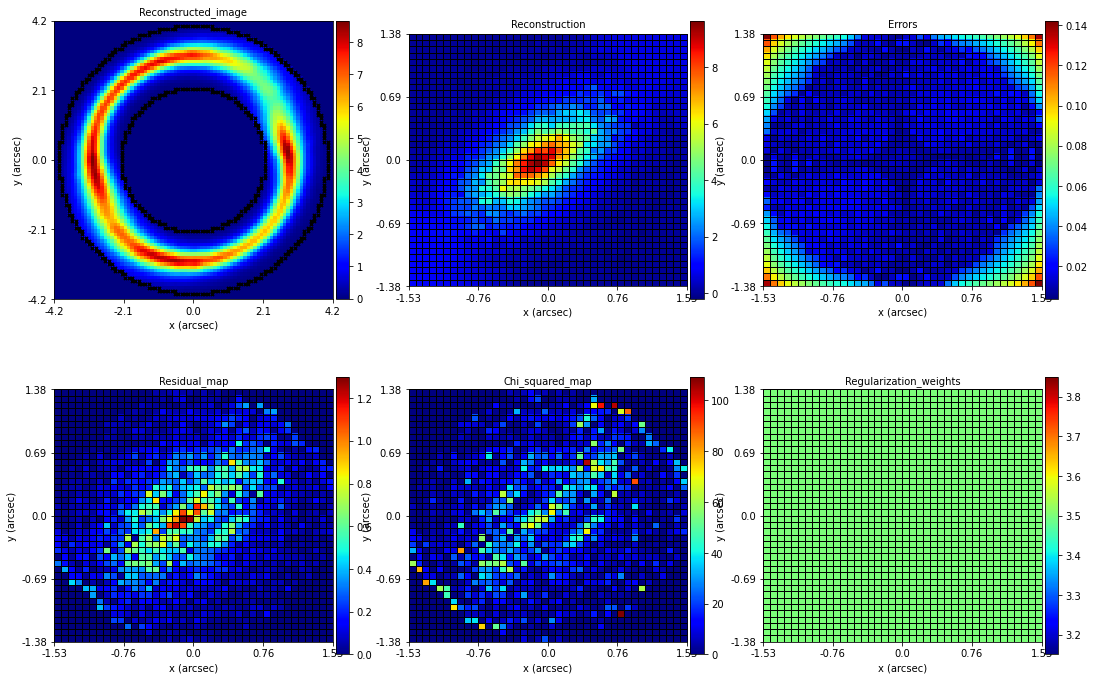

-9831.426358993434

In [21]:
plt.figure(figsize=(10,10))
model(p0)

## Input Model

ParsDic {'ml': 5.0, 'beta': 0.35, 'qinc': 0.502415916, 'log_mbh': 9.0, 'kappa_s': 0.075, 'qDM': 0.838198304, 'mag_shear': 0.02, 'phi_shear': 88.0, 'gamma': 1.0}
jam_axi_rms elapsed time sec: 0.60
inc=75.0 beta_z=0.35 M/L=1 BH=1.00e+09 chi2/DOF=1
Total mass MGE: 9.983e+12


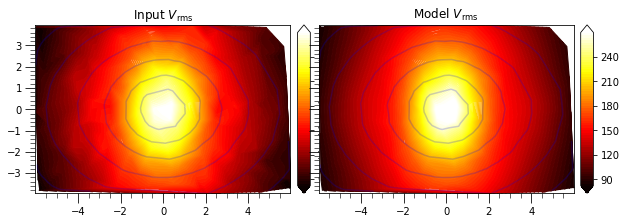

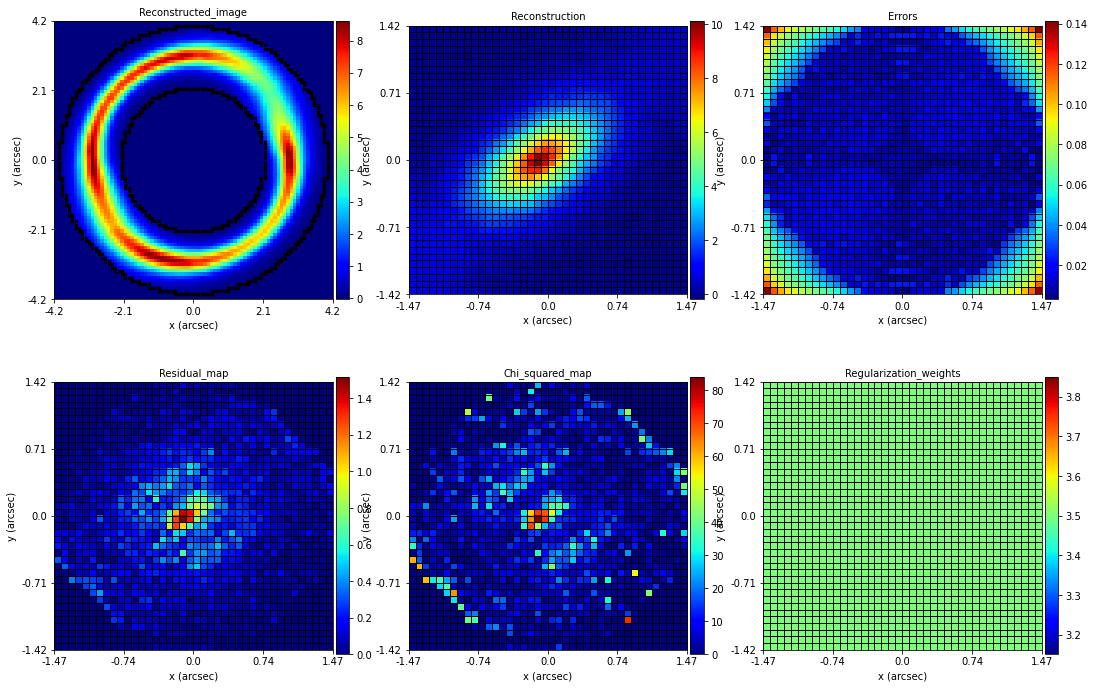

-5074.747831489048

In [36]:
plt.figure(figsize=(10,10))

p0 = np.array([5.00000000e+00, 3.50000000e-01, 5.02415916e-01, 9.00000000e+00,
 7.50000000e-02, 8.38198304e-01, 2.00000000e-02, 8.80000000e+01,
 1.00000000e+00])
model(p0)

(0.9, 1.1)

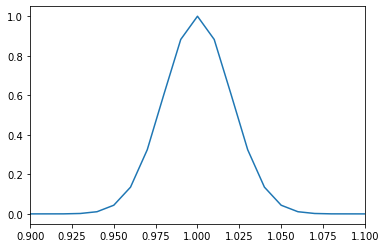

In [54]:
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
exp = np.e**(-0.5 * (x - 1)**2/0.02**2)
plt.plot(x, exp)
plt.xlim(0.9, 1.1)